In [1]:
import pandas as pd
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_excel('./data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast',
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly',
       'Water  (component 4)(kg in a m^3 mixture)': 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)' :'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine', 
       'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'
}, inplace=True)

In [6]:
df.head()

,cement,blast,fly,water,super,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
X = df.drop(['strength'], axis=1)
X

,cement,blast,fly,water,super,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [8]:
y = df['strength']
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [9]:
# Scaling by minmax
scaler = MinMaxScaler()

In [10]:
X = scaler.fit_transform(X)
X.shape

(1030, 8)

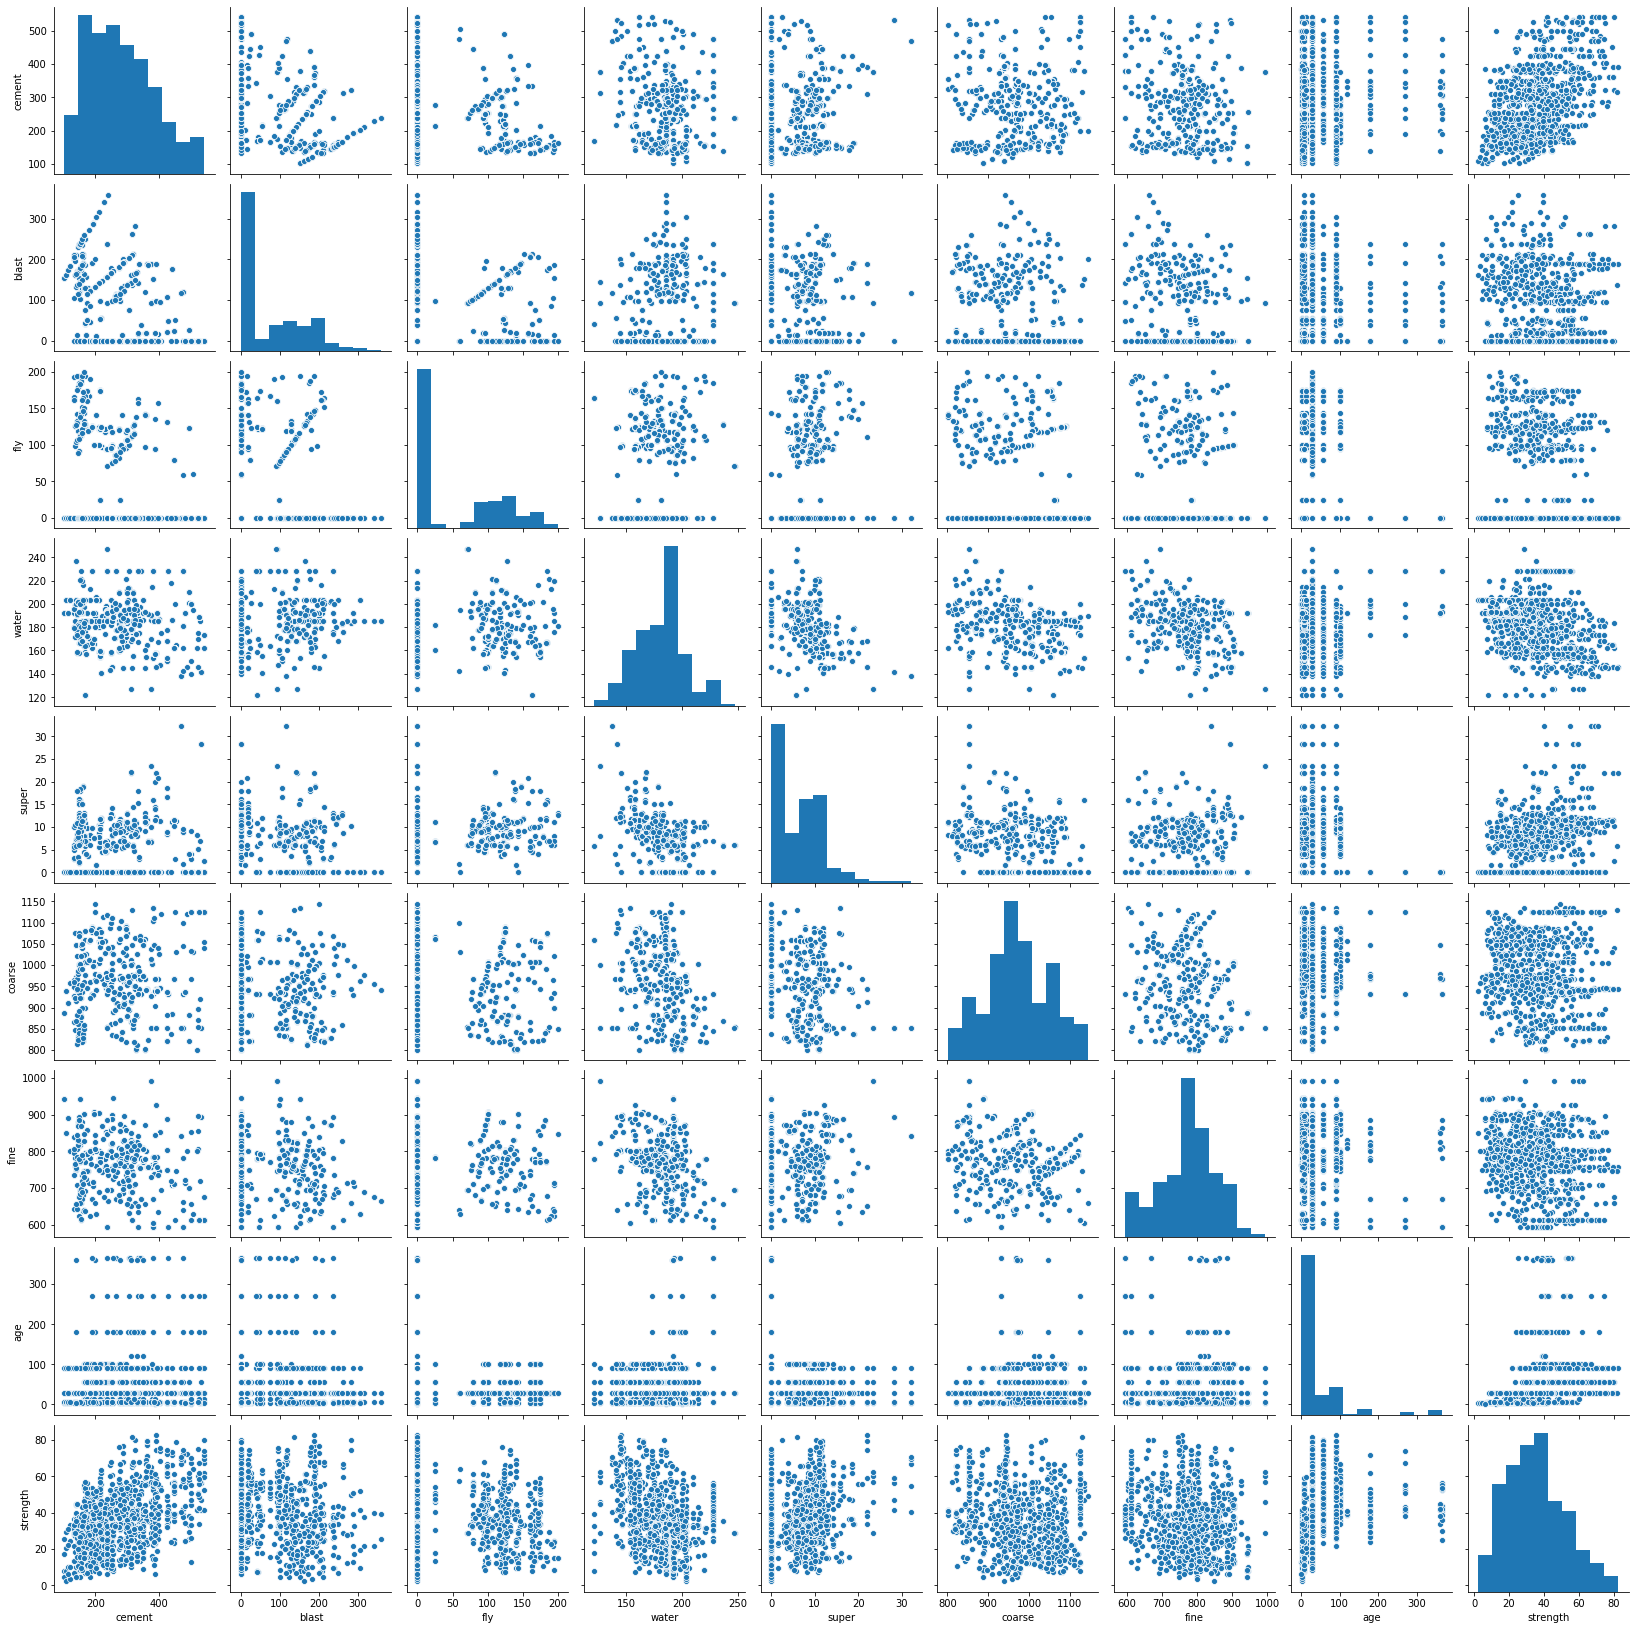

In [11]:
sns.pairplot(df)

In [12]:
# modeling
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu', ))
model.add(Dense(32, activation='relu', ))
model.add(Dense(1, activation='relu', ))

model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [14]:
X_train.shape

(927, 8)

In [15]:
hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.1)

Train on 834 samples, validate on 93 samples
Epoch 1/1000
834/834 [==============================] - 3s 3ms/step - loss: 1470.0464 - val_loss: 1258.1246
Epoch 2/1000
834/834 [==============================] - 0s 313us/step - loss: 648.6145 - val_loss: 261.1107
Epoch 3/1000
834/834 [==============================] - 0s 319us/step - loss: 248.9391 - val_loss: 204.1821
Epoch 4/1000
834/834 [==============================] - 0s 254us/step - loss: 200.6303 - val_loss: 166.0256
Epoch 5/1000
834/834 [==============================] - 0s 252us/step - loss: 170.0040 - val_loss: 144.1430
Epoch 6/1000
834/834 [==============================] - 0s 252us/step - loss: 149.8112 - val_loss: 137.5583
Epoch 7/1000
834/834 [==============================] - 0s 238us/step - loss: 135.1692 - val_loss: 129.9352
Epoch 8/1000
834/834 [==============================] - 0s 237us/step - loss: 127.9516 - val_loss: 127.1013
Epoch 9/1000
834/834 [==============================] - 0s 242us/step - loss: 127.2181 - va

834/834 [==============================] - 0s 385us/step - loss: 36.1085 - val_loss: 41.2205
Epoch 77/1000
834/834 [==============================] - 0s 231us/step - loss: 36.7085 - val_loss: 38.3337
Epoch 78/1000
834/834 [==============================] - 0s 257us/step - loss: 35.4878 - val_loss: 37.6916
Epoch 79/1000
834/834 [==============================] - 0s 387us/step - loss: 36.3894 - val_loss: 38.4182
Epoch 80/1000
834/834 [==============================] - 0s 278us/step - loss: 35.7838 - val_loss: 42.8223
Epoch 81/1000
834/834 [==============================] - 0s 242us/step - loss: 36.3644 - val_loss: 38.1426
Epoch 82/1000
834/834 [==============================] - 0s 238us/step - loss: 34.5577 - val_loss: 37.3693
Epoch 83/1000
834/834 [==============================] - 0s 259us/step - loss: 35.4625 - val_loss: 36.7435
Epoch 84/1000
834/834 [==============================] - 0s 241us/step - loss: 34.1949 - val_loss: 36.2009
Epoch 85/1000
834/834 [============================

Epoch 152/1000
834/834 [==============================] - 0s 302us/step - loss: 22.5684 - val_loss: 25.8280
Epoch 153/1000
834/834 [==============================] - 0s 295us/step - loss: 22.9359 - val_loss: 28.8328
Epoch 154/1000
834/834 [==============================] - 0s 300us/step - loss: 23.1638 - val_loss: 24.9040
Epoch 155/1000
834/834 [==============================] - 0s 304us/step - loss: 21.9527 - val_loss: 28.1168
Epoch 156/1000
834/834 [==============================] - 0s 297us/step - loss: 22.6962 - val_loss: 25.1891
Epoch 157/1000
834/834 [==============================] - 0s 306us/step - loss: 23.6114 - val_loss: 27.6410
Epoch 158/1000
834/834 [==============================] - 0s 300us/step - loss: 22.8126 - val_loss: 26.0526
Epoch 159/1000
834/834 [==============================] - 0s 310us/step - loss: 21.8095 - val_loss: 24.6015
Epoch 160/1000
834/834 [==============================] - 0s 315us/step - loss: 21.7906 - val_loss: 26.3397
Epoch 161/1000
834/834 [====

Epoch 228/1000
834/834 [==============================] - 0s 383us/step - loss: 18.0793 - val_loss: 21.7387
Epoch 229/1000
834/834 [==============================] - 0s 219us/step - loss: 17.6434 - val_loss: 21.9371
Epoch 230/1000
834/834 [==============================] - 0s 192us/step - loss: 21.4433 - val_loss: 24.7783
Epoch 231/1000
834/834 [==============================] - 0s 194us/step - loss: 17.3494 - val_loss: 21.8085
Epoch 232/1000
834/834 [==============================] - 0s 197us/step - loss: 16.8586 - val_loss: 21.6640
Epoch 233/1000
834/834 [==============================] - 0s 193us/step - loss: 16.9327 - val_loss: 20.1326
Epoch 234/1000
834/834 [==============================] - 0s 203us/step - loss: 16.9517 - val_loss: 23.9247
Epoch 235/1000
834/834 [==============================] - 0s 234us/step - loss: 17.1534 - val_loss: 21.8404
Epoch 236/1000
834/834 [==============================] - 0s 237us/step - loss: 17.4939 - val_loss: 25.2918
Epoch 237/1000
834/834 [====

Epoch 304/1000
834/834 [==============================] - 0s 198us/step - loss: 13.6476 - val_loss: 19.4619
Epoch 305/1000
834/834 [==============================] - 0s 195us/step - loss: 13.6051 - val_loss: 20.2343
Epoch 306/1000
834/834 [==============================] - 0s 209us/step - loss: 13.4300 - val_loss: 19.1861
Epoch 307/1000
834/834 [==============================] - 0s 256us/step - loss: 13.6478 - val_loss: 18.8616
Epoch 308/1000
834/834 [==============================] - 0s 240us/step - loss: 13.8725 - val_loss: 18.7238
Epoch 309/1000
834/834 [==============================] - 0s 235us/step - loss: 14.1077 - val_loss: 18.7874
Epoch 310/1000
834/834 [==============================] - 0s 245us/step - loss: 13.3921 - val_loss: 20.0259
Epoch 311/1000
834/834 [==============================] - 0s 246us/step - loss: 16.0491 - val_loss: 20.0337
Epoch 312/1000
834/834 [==============================] - 0s 245us/step - loss: 14.7741 - val_loss: 18.9269
Epoch 313/1000
834/834 [====

Epoch 380/1000
834/834 [==============================] - 0s 200us/step - loss: 11.2648 - val_loss: 18.5305
Epoch 381/1000
834/834 [==============================] - 0s 191us/step - loss: 10.7551 - val_loss: 19.2716
Epoch 382/1000
834/834 [==============================] - 0s 192us/step - loss: 11.1678 - val_loss: 19.8431
Epoch 383/1000
834/834 [==============================] - 0s 191us/step - loss: 11.9711 - val_loss: 18.9658
Epoch 384/1000
834/834 [==============================] - 0s 195us/step - loss: 13.4838 - val_loss: 28.0987
Epoch 385/1000
834/834 [==============================] - 0s 194us/step - loss: 14.5710 - val_loss: 21.6822
Epoch 386/1000
834/834 [==============================] - 0s 214us/step - loss: 11.2479 - val_loss: 19.7538
Epoch 387/1000
834/834 [==============================] - 0s 213us/step - loss: 11.4140 - val_loss: 19.1009
Epoch 388/1000
834/834 [==============================] - 0s 206us/step - loss: 11.6345 - val_loss: 18.8079
Epoch 389/1000
834/834 [====

834/834 [==============================] - 0s 236us/step - loss: 10.2472 - val_loss: 17.7213
Epoch 457/1000
834/834 [==============================] - 0s 234us/step - loss: 9.9320 - val_loss: 18.2938
Epoch 458/1000
834/834 [==============================] - 0s 239us/step - loss: 9.2165 - val_loss: 17.4730
Epoch 459/1000
834/834 [==============================] - 0s 240us/step - loss: 9.3196 - val_loss: 17.3377
Epoch 460/1000
834/834 [==============================] - 0s 236us/step - loss: 10.6884 - val_loss: 17.7692
Epoch 461/1000
834/834 [==============================] - 0s 236us/step - loss: 10.7341 - val_loss: 18.9507
Epoch 462/1000
834/834 [==============================] - 0s 232us/step - loss: 9.7029 - val_loss: 19.8847
Epoch 463/1000
834/834 [==============================] - 0s 237us/step - loss: 10.8108 - val_loss: 17.8437
Epoch 464/1000
834/834 [==============================] - 0s 234us/step - loss: 9.5301 - val_loss: 18.1391
Epoch 465/1000
834/834 [========================

834/834 [==============================] - 0s 298us/step - loss: 11.1387 - val_loss: 16.8370
Epoch 533/1000
834/834 [==============================] - 0s 295us/step - loss: 7.9709 - val_loss: 16.1949
Epoch 534/1000
834/834 [==============================] - 0s 299us/step - loss: 8.5470 - val_loss: 16.8597
Epoch 535/1000
834/834 [==============================] - 0s 299us/step - loss: 7.7360 - val_loss: 17.3745
Epoch 536/1000
834/834 [==============================] - 0s 298us/step - loss: 8.9351 - val_loss: 18.0368
Epoch 537/1000
834/834 [==============================] - 0s 299us/step - loss: 8.2980 - val_loss: 17.7248
Epoch 538/1000
834/834 [==============================] - 0s 290us/step - loss: 8.3250 - val_loss: 18.0801
Epoch 539/1000
834/834 [==============================] - 0s 307us/step - loss: 7.8839 - val_loss: 17.5174
Epoch 540/1000
834/834 [==============================] - 0s 299us/step - loss: 9.4034 - val_loss: 18.8067
Epoch 541/1000
834/834 [===========================

834/834 [==============================] - 0s 305us/step - loss: 8.1087 - val_loss: 16.2641
Epoch 609/1000
834/834 [==============================] - 0s 294us/step - loss: 7.4090 - val_loss: 17.2034
Epoch 610/1000
834/834 [==============================] - 0s 296us/step - loss: 8.8274 - val_loss: 16.4183
Epoch 611/1000
834/834 [==============================] - 0s 302us/step - loss: 7.3490 - val_loss: 16.6070
Epoch 612/1000
834/834 [==============================] - 0s 287us/step - loss: 7.3555 - val_loss: 17.0199
Epoch 613/1000
834/834 [==============================] - 0s 309us/step - loss: 6.8869 - val_loss: 17.2188
Epoch 614/1000
834/834 [==============================] - 0s 299us/step - loss: 7.1639 - val_loss: 17.2275
Epoch 615/1000
834/834 [==============================] - 0s 292us/step - loss: 7.2055 - val_loss: 17.2017
Epoch 616/1000
834/834 [==============================] - 0s 285us/step - loss: 7.4614 - val_loss: 16.6160
Epoch 617/1000
834/834 [============================

834/834 [==============================] - 0s 331us/step - loss: 7.3577 - val_loss: 17.0773
Epoch 685/1000
834/834 [==============================] - 0s 571us/step - loss: 6.4651 - val_loss: 17.2207
Epoch 686/1000
834/834 [==============================] - 1s 870us/step - loss: 6.3263 - val_loss: 16.8707
Epoch 687/1000
834/834 [==============================] - 0s 491us/step - loss: 6.2792 - val_loss: 18.1273
Epoch 688/1000
834/834 [==============================] - 0s 481us/step - loss: 6.7087 - val_loss: 16.7639
Epoch 689/1000
834/834 [==============================] - 0s 404us/step - loss: 6.1372 - val_loss: 17.8992
Epoch 690/1000
834/834 [==============================] - 1s 632us/step - loss: 7.1740 - val_loss: 20.8077
Epoch 691/1000
834/834 [==============================] - 0s 343us/step - loss: 10.0933 - val_loss: 18.7792
Epoch 692/1000
834/834 [==============================] - 0s 413us/step - loss: 6.8127 - val_loss: 16.8455
Epoch 693/1000
834/834 [===========================

834/834 [==============================] - 0s 273us/step - loss: 6.3362 - val_loss: 17.5022
Epoch 761/1000
834/834 [==============================] - 0s 327us/step - loss: 6.9732 - val_loss: 18.0604
Epoch 762/1000
834/834 [==============================] - 0s 288us/step - loss: 6.5131 - val_loss: 16.5442
Epoch 763/1000
834/834 [==============================] - 0s 231us/step - loss: 5.7744 - val_loss: 17.6850
Epoch 764/1000
834/834 [==============================] - 0s 243us/step - loss: 5.8002 - val_loss: 17.1921
Epoch 765/1000
834/834 [==============================] - 0s 246us/step - loss: 6.2757 - val_loss: 19.1892
Epoch 766/1000
834/834 [==============================] - 0s 328us/step - loss: 6.2361 - val_loss: 16.7207
Epoch 767/1000
834/834 [==============================] - 0s 247us/step - loss: 5.7638 - val_loss: 16.4222
Epoch 768/1000
834/834 [==============================] - 0s 234us/step - loss: 5.7985 - val_loss: 16.6826
Epoch 769/1000
834/834 [============================

834/834 [==============================] - 0s 315us/step - loss: 5.9788 - val_loss: 16.1140
Epoch 837/1000
834/834 [==============================] - 0s 320us/step - loss: 5.5738 - val_loss: 20.3588
Epoch 838/1000
834/834 [==============================] - 0s 303us/step - loss: 6.4966 - val_loss: 17.6981
Epoch 839/1000
834/834 [==============================] - 0s 299us/step - loss: 5.5602 - val_loss: 16.8016
Epoch 840/1000
834/834 [==============================] - 0s 304us/step - loss: 5.1060 - val_loss: 15.9668
Epoch 841/1000
834/834 [==============================] - 0s 307us/step - loss: 5.7661 - val_loss: 17.2345
Epoch 842/1000
834/834 [==============================] - 0s 305us/step - loss: 5.7107 - val_loss: 16.8450
Epoch 843/1000
834/834 [==============================] - 0s 314us/step - loss: 5.5088 - val_loss: 16.0486
Epoch 844/1000
834/834 [==============================] - 0s 304us/step - loss: 5.3176 - val_loss: 17.1049
Epoch 845/1000
834/834 [============================

834/834 [==============================] - 0s 316us/step - loss: 4.8322 - val_loss: 15.7872
Epoch 913/1000
834/834 [==============================] - 0s 305us/step - loss: 5.3737 - val_loss: 15.9221
Epoch 914/1000
834/834 [==============================] - 0s 303us/step - loss: 4.8968 - val_loss: 16.9984
Epoch 915/1000
834/834 [==============================] - 0s 305us/step - loss: 5.1439 - val_loss: 15.9127
Epoch 916/1000
834/834 [==============================] - 0s 303us/step - loss: 5.4295 - val_loss: 16.3340
Epoch 917/1000
834/834 [==============================] - 0s 416us/step - loss: 5.7793 - val_loss: 19.6687
Epoch 918/1000
834/834 [==============================] - 0s 386us/step - loss: 5.8303 - val_loss: 17.1271
Epoch 919/1000
834/834 [==============================] - 0s 409us/step - loss: 5.4244 - val_loss: 17.5517
Epoch 920/1000
834/834 [==============================] - 0s 368us/step - loss: 5.7556 - val_loss: 16.3504
Epoch 921/1000
834/834 [============================

834/834 [==============================] - 0s 332us/step - loss: 5.0310 - val_loss: 15.6344
Epoch 989/1000
834/834 [==============================] - 0s 299us/step - loss: 4.8343 - val_loss: 15.4423
Epoch 990/1000
834/834 [==============================] - 0s 301us/step - loss: 4.5532 - val_loss: 19.2834
Epoch 991/1000
834/834 [==============================] - 0s 306us/step - loss: 5.1115 - val_loss: 17.6395
Epoch 992/1000
834/834 [==============================] - 0s 303us/step - loss: 7.3060 - val_loss: 16.3772
Epoch 993/1000
834/834 [==============================] - 0s 350us/step - loss: 6.2433 - val_loss: 16.3351
Epoch 994/1000
834/834 [==============================] - 0s 387us/step - loss: 5.7307 - val_loss: 16.5399
Epoch 995/1000
834/834 [==============================] - 0s 388us/step - loss: 4.8634 - val_loss: 16.2772
Epoch 996/1000
834/834 [==============================] - 0s 400us/step - loss: 5.5355 - val_loss: 15.6062
Epoch 997/1000
834/834 [============================

In [16]:
score = model.evaluate(X_test, y_test)
score

103/103 [==============================] - 0s 403us/step


21.140383711138977

In [17]:
pred = model.predict(X_test[-5:])
print(pred)
print(y_test[-5:])

[[32.592678]
 [66.34925 ]
 [59.446068]
 [47.11572 ]
 [11.018806]]
77     33.398217
529    68.750607
400    67.865123
480    39.300132
629    11.169511
Name: strength, dtype: float64


Text(0.5, 1.0, 'loss')

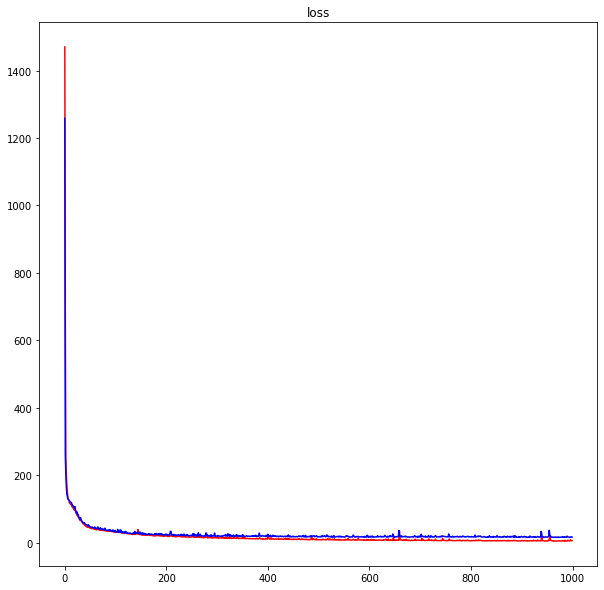

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')